In [59]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import accuracy_score

In [289]:
pd.options.display.max_colwidth = 80

In [173]:
with open("documents/af_lbd_vectors_df_total_88.pkl", "rb") as picklefile:
    af_lbd_vectors_df = pickle.load(picklefile)

In [174]:
af_lbd_vectors_df[af_lbd_vectors_df.disease == 'lbd'].head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,disease
PMC6088773,-0.020944,-0.006814,0.059834,0.002858,0.026976,-0.011505,-0.013803,-0.009671,-0.016656,-0.011772,...,-0.024884,-0.031693,0.064884,-0.006438,-0.081982,-0.005331,0.043295,-0.002021,-0.052072,lbd
PMC4892610,-0.020944,-0.006814,0.059834,0.002858,0.026976,-0.011505,-0.013803,-0.009671,-0.016656,-0.011772,...,-0.024884,-0.031693,0.064884,-0.006438,-0.081982,-0.005331,0.043295,-0.002021,-0.052072,lbd
PMC5840831,-0.020944,-0.006814,0.059834,0.002858,0.026976,-0.011505,-0.013803,-0.009671,-0.016656,-0.011772,...,-0.024884,-0.031693,0.064884,-0.006438,-0.081982,-0.005331,0.043295,-0.002021,-0.052072,lbd
PMC4275567,-0.020944,-0.006814,0.059834,0.002858,0.026976,-0.011505,-0.013803,-0.009671,-0.016656,-0.011772,...,-0.024884,-0.031693,0.064884,-0.006438,-0.081982,-0.005331,0.043295,-0.002021,-0.052072,lbd
PMC5724510,-0.020944,-0.006814,0.059834,0.002858,0.026976,-0.011505,-0.013803,-0.009671,-0.016656,-0.011772,...,-0.024884,-0.031693,0.064884,-0.006438,-0.081982,-0.005331,0.043295,-0.002021,-0.052072,lbd


We'll try several types of clustering on these vectors.

* KMeans
* DBScan
* Ward hierchical clustering

In [175]:
# First, we'll drop the disease column from the dataframe so that we can run clustering on just the word2vec vectors.
disease_labels = af_lbd_vectors_df['disease']
af_lbd_vectors_df.drop(columns=['disease'], inplace=True)

In [176]:
disease_labels.value_counts()

lbd    52
af     36
Name: disease, dtype: int64

In [177]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(af_lbd_vectors_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [178]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

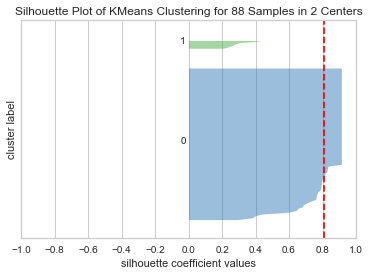

In [179]:
# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2))
visualizer.fit(af_lbd_vectors_df)
visualizer.poof('figures/silhouette_plot_k_means.png')

We know that in reality, there are 52 papers about Lewy body disease and 36 papers on atrial fibrillation. K means does a pretty poor job, since it clusters 5 papers together and clusters the other 83 into another cluster.

Let's try DBSCAN next.

In [181]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(af_lbd_vectors_df)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [182]:
db.labels_

array([-1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [183]:
db = DBSCAN(eps=0.3, min_samples=20)
db.fit(af_lbd_vectors_df)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=1, p=None)

In [184]:
db.labels_

array([-1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

DBSCAN also doesn't do very well on clustering papers. We'll try agglomerative clustering next.

In [185]:
ag_cluster = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2)
ag_cluster.fit(af_lbd_vectors_df)
ag_cluster.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
ag_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
ag_cluster.fit(af_lbd_vectors_df)
ag_cluster.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Clustering after performing tSNE

Interestingly, looking at the tSNE projects of the af and lbd papers, it looks like there are clear clusters when the vectors are squashed to 2D vector space. So let's try clustering on the tSNE transformed vectors.

In [187]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)

af_lbd_tsne = tsne.fit_transform(af_lbd_vectors_df)

[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.000s...
[t-SNE] Computed neighbors for 88 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.940628
[t-SNE] Error after 1000 iterations: 0.069403


## Plotting clustering labels on tSNE plot

In [195]:
af_lbd_tsne_clustering_labels = pd.DataFrame(af_lbd_tsne, index=disease_labels.index)

In [198]:
af_lbd_tsne_clustering_labels = pd.concat((af_lbd_tsne_clustering_labels, disease_labels), axis=1, join='inner')

In [199]:
af_lbd_tsne_clustering_labels['kmeans_labels'] = kmeans.labels_
af_lbd_tsne_clustering_labels['dbscan_labels'] = db.labels_
af_lbd_tsne_clustering_labels['ag_labels'] = ag_cluster.labels_

Let's plot the labels that each of these clustering algorithms assigns to the papers.

In [204]:
af_lbd_tsne_clustering_labels = af_lbd_tsne_clustering_labels.rename(columns={0:'x', 1:'y'})

af_lbd_tsne_clustering_labels.head()

,x,y,disease,kmeans_labels,dbscan_labels,ag_labels
PMC4952027,8.010901,9.763558,af,1,-1,1
PMC5598874,7.329449,10.527578,af,0,0,0
PMC4766963,8.252251,13.492894,af,0,0,0
PMC5658096,8.002549,9.760319,af,1,-1,1
PMC5560908,6.863257,11.829141,af,0,0,0


In [214]:
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['savefig.dpi'] = 100

In [235]:
groups = af_lbd_tsne_clustering_labels.groupby('disease')

af
lbd


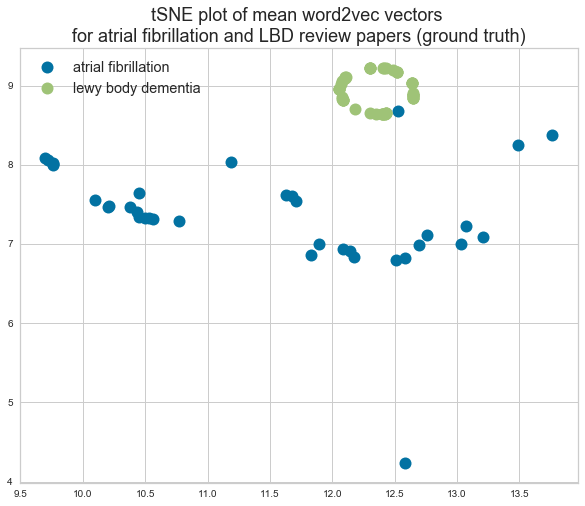

In [242]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

disease_dict = {'af':'atrial fibrillation', 'lbd':'lewy body dementia'}
legend_dict = {0: 'atrial fibrillation', 1: 'lewy body dementia'}

for name, group in groups:
    print(name)
    ax.plot(group.y, group.x, marker='o', linestyle='', ms=12, label=disease_dict[name])
ax.legend()
plt.title("tSNE plot of mean word2vec vectors \nfor atrial fibrillation and LBD review papers (ground truth)", )

fig = plt.gcf()
fig.savefig('figures/af_lbd_true_clusters.png')

plt.show()

In [31]:
kmeans.fit(af_lbd_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

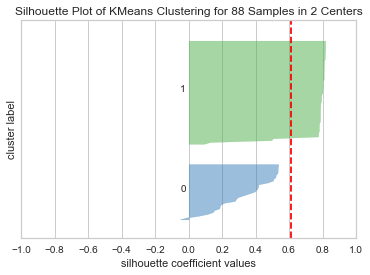

In [55]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2))
visualizer.fit(af_lbd_tsne)
visualizer.poof(outpath='figures/silhouette_plot_tsne_k_means.png')

In [50]:
label_comparison = pd.DataFrame({'disease': disease_labels, 'kmeans_predictions_on_tSNE': kmeans.labels_})

In [57]:
comp = label_comparison.replace({0: 'af', 1: 'lbd'})

In [60]:
accuracy_score(comp.disease, comp.kmeans_predictions_on_tSNE)

0.9431818181818182

What if we used tSNE to transform it to 3 dimensions?

[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.000s...
[t-SNE] Computed neighbors for 88 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.487480
[t-SNE] Error after 1000 iterations: 0.946411


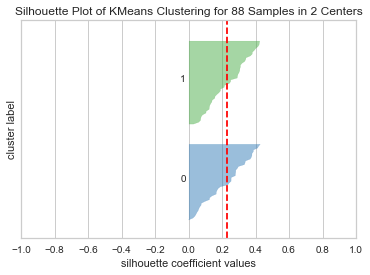

In [63]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000)

af_lbd_tsne = tsne.fit_transform(af_lbd_vectors_df)

kmeans.fit(af_lbd_tsne)

kmeans.labels_

visualizer = SilhouetteVisualizer(KMeans(n_clusters=2))
visualizer.fit(af_lbd_tsne)
visualizer.poof()

label_comparison = pd.DataFrame({'disease': disease_labels, 'kmeans_predictions_on_tSNE': kmeans.labels_})

In [65]:
comp = label_comparison.replace({0: 'af', 1: 'lbd'})

accuracy_score(comp.disease, comp.kmeans_predictions_on_tSNE)

0.625

In [73]:
comp.head()

,disease,kmeans_predictions_on_tSNE
PMC4952027,af,lbd
PMC5598874,af,lbd
PMC4766963,af,af
PMC5658096,af,af
PMC5560908,af,af


There's actually worse accuracy when we use tSNE to reduce to 3 dimensions, it drops to an accuracy of 62.5%.

## Clustering within medical topics

Let's see whether or not any of these clustering methods are actually able to distinguish the sub-groups for the review papers within each topic, e.g. the sub-topics for the review papers for atrial fibrillation, and the subtopics for the review papers for LBD.

I will look at the titles and abstracts for each topic, and label each of these papers by sub-topic.

In [263]:
%%bash
ls documents/

ClinicalSenseInventoryII_RefinedMasterFile.txt
ClinicalSenseInventoryI_MasterFile.txt
af_lbd_vectors_df_total_88.pkl
af_tsne_88.pkl
atrial_fibrillation_review_paper_dictionary_list.pkl
dict_structure.txt
lewy_body_dementia_review_paper_dictionary_list.pkl
word_to_w2v_chunk_dict.pkl


In [264]:
with open("documents/atrial_fibrillation_review_paper_dictionary_list.pkl", "rb") as picklefile:
    af_list_of_paper_dictionaries = pickle.load(picklefile)

In [265]:
with open("documents/lewy_body_dementia_review_paper_dictionary_list.pkl", "rb") as picklefile:
    lbd_list_of_paper_dictionaries = pickle.load(picklefile)

In [266]:
af_list_of_paper_dictionaries[0].keys()

dict_keys(['pmcid', 'title', 'keywords', 'abstract_text', 'article_text', 'citation_tuples'])

In [267]:
my_labels = {'PMC4952027': 'detecting_afib',
'PMC5598874': 'cardiac_comorbidities',
'PMC4766963': 'stroke_prevention',
'PMC5658096': 'rate_control',
'PMC5560908': 'hyperthyroidism',
'PMC5089715': 'quality_of_life',
'PMC5079045': 'BMI',
'PMC5543536': 'quality_of_life',
'PMC5340010': 'rate_control',
'PMC5442605': 'cardiac_comorbidities',
'PMC5380695': 'BMI',
'PMC5286679': 'vitamin_C',
'PMC5321114': 'post_stroke',
'PMC5382469': 'digoxin',
'PMC5465041': 'heat_shock_proteins',
'PMC4599513': 'contact_force',
'PMC4937957': 'RAAS_blockers_clinical_outcomes',
'PMC5752005': 'hybrid_ablation',
'PMC5586302': 'anticoagulation',
'PMC5331111': 'anticoagulation',
'PMC4819630': 'prior_research',
'PMC5704695': 'anticoagulation',
'PMC5622555': 'inflammation',
'PMC5345987': 'atrial_appendage_occlusion',
'PMC5656712': 'pharm_non_pharm_tx',
'PMC4742513': 'anticoagulation',
'PMC5482349': 'cardiac_comorbidities',
'PMC4630199': 'elderly',
'PMC5588987': 'rate_control',
'PMC4642960': 'anticoagulation',
'PMC4788372': 'post_stroke',
'PMC5457732': 'case_report_air_embolus',
'PMC5487882': 'anticoagulation',
'PMC5382449': 'thiazolidenedione_dm',
'PMC4957677': 'biomarkers_prediction',
'PMC5234257': 'anticoagulation'}

In [268]:
my_labels_series = pd.Series(my_labels, name='my_labels')

There are roughly six different groups here; the two groups with the most papers and that are the clearest are 1) anticoagulation for stroke prevention in afib (by far the largest group of papers), and 2) cardiac comorbidities of afib.

In [269]:
af_titles_series = pd.Series(dict([(paper_dict['pmcid'], paper_dict['title']) for paper_dict in af_list_of_paper_dictionaries]), name='title')

We'll take just the afib papers out of the dataframe, and append the titles as another column. That way, after we cluster the af vectors to get subgroups, we can inspect the groups' titles and see whether or not the clustering worked to find coherent subgroups.

In [270]:
af_lbd_master_df = af_lbd_vectors_df.copy()
af_lbd_master_df['disease'] = disease_labels

af_only_df = af_lbd_master_df[af_lbd_master_df['disease'] == 'af']

In [271]:
af_only_df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,disease
PMC4952027,0.108578,0.014236,0.126349,-0.018508,-0.003937,-0.054088,-0.015865,0.049515,0.029591,0.041948,...,-0.039361,-0.044799,0.180942,-0.080833,-0.070030,-0.036287,0.058504,-0.119676,-0.042465,af
PMC5598874,0.035391,-0.009505,0.077115,0.001718,0.009646,-0.029854,-0.036542,0.011701,0.022566,0.008012,...,-0.027311,0.009091,0.116452,-0.021094,-0.055232,-0.030666,0.038592,-0.030184,-0.022142,af
PMC4766963,-0.020013,0.000664,0.057269,0.000132,0.035205,-0.010239,0.005150,-0.023424,-0.006362,0.007802,...,-0.034125,-0.016188,0.060983,-0.010923,-0.074063,0.003198,0.054743,0.000657,-0.055037,af
PMC5658096,0.092107,0.007223,0.095593,-0.012471,0.000387,-0.015313,-0.002209,0.033225,0.058173,0.081660,...,-0.013515,-0.046041,0.169994,-0.064452,-0.059798,-0.012026,0.061603,-0.154184,-0.017592,af
PMC5560908,0.013374,-0.004830,0.034372,-0.015625,0.031402,-0.006404,-0.014717,-0.007613,0.007448,0.020051,...,-0.000990,0.014396,0.084523,-0.017900,-0.041998,0.001138,0.037859,-0.058165,-0.022769,af


In [272]:
af_only_df = pd.concat((af_only_df, af_titles_series), axis=1, join='inner')

af_only_df = pd.concat((af_only_df, my_labels_series), axis=1, join='inner')

In [273]:
# I labeled 23 different groups.
af_only_df.my_labels.value_counts()

anticoagulation                    7
rate_control                       3
cardiac_comorbidities              3
BMI                                2
post_stroke                        2
quality_of_life                    2
biomarkers_prediction              1
hyperthyroidism                    1
RAAS_blockers_clinical_outcomes    1
digoxin                            1
atrial_appendage_occlusion         1
heat_shock_proteins                1
elderly                            1
prior_research                     1
hybrid_ablation                    1
vitamin_C                          1
case_report_air_embolus            1
contact_force                      1
pharm_non_pharm_tx                 1
thiazolidenedione_dm               1
stroke_prevention                  1
detecting_afib                     1
inflammation                       1
Name: my_labels, dtype: int64

## Cluster on AF only papers

Let's try k-means clustering of the AF papers.

In [291]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(af_only_df.drop(columns=['disease', 'title', 'my_labels']))

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [292]:
db.labels_

array([-1,  0,  1, -1,  1,  1, -1, -1,  1,  0, -1,  0,  1,  1,  1,  0,  2,
       -1,  0,  1,  1,  2,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  2,
        1,  1])

In [293]:
af_only_df['dbscan_label'] = db.labels_

In [281]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(af_only_df.drop(columns=['disease', 'title', 'my_labels']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [282]:
kmeans.labels_

array([5, 0, 2, 5, 2, 2, 4, 7, 2, 0, 1, 0, 2, 2, 2, 0, 3, 6, 0, 2, 2, 3,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2], dtype=int32)

In [283]:
af_only_df['kmeans_labels'] = kmeans.labels_

In [284]:
pd.options.display.max_colwidth = 150

In [285]:
af_only_df[['title', 'kmeans_labels', 'my_labels']]

,title,kmeans_labels,my_labels
PMC4952027,Accuracy of methods for detecting an irregular pulse and suspected atrial fibrillation: A systematic review and meta-analysis,5,detecting_afib
PMC5598874,"Atrial fibrillation and the risk for myocardial infarction, all-cause mortality and heart failure: A systematic review and meta-analysis",0,cardiac_comorbidities
PMC4766963,European Primary Care Cardiovascular Society (EPCCS) consensus guidance on stroke prevention in atrial fibrillation (SPAF) in primary care,2,stroke_prevention
PMC5658096,The effects of rhythm control strategies versus rate control strategies for atrial fibrillation and atrial flutter: A systematic review with meta-...,5,rate_control
PMC5560908,Atrial fibrillation and hyperthyroidism: A literature review,2,hyperthyroidism
PMC5089715,Patient-Reported Outcomes for Quality of Life Assessment in Atrial Fibrillation: A Systematic Review of Measurement Properties,2,quality_of_life
PMC5079045,Relation of Body Mass Index With Adverse Outcomes Among Patients With Atrial Fibrillation: A Meta‐Analysis and Systematic Review,4,BMI
PMC5543536,Measuring the effect of nurse practitioner (NP)-led care on health-related quality of life in adult patients with atrial fibrillation: study proto...,7,quality_of_life
PMC5340010,The effects of rhythm control strategies versus rate control strategies for atrial fibrillation and atrial flutter: a protocol for a systematic re...,2,rate_control
PMC5442605,Are Cardiovascular Risk Factors also Associated with the Incidence of Atrial Fibrillation?,0,cardiac_comorbidities


In [286]:
af_only_df[af_only_df.my_labels == 'cardiac_comorbidities'][['title', 'kmeans_labels', 'my_labels']]

,title,kmeans_labels,my_labels
PMC5598874,"Atrial fibrillation and the risk for myocardial infarction, all-cause mortality and heart failure: A systematic review and meta-analysis",0,cardiac_comorbidities
PMC5442605,Are Cardiovascular Risk Factors also Associated with the Incidence of Atrial Fibrillation?,0,cardiac_comorbidities
PMC5482349,Atrial fibrillation as risk factor for cardiovascular disease and death in women compared with men: systematic review and meta-analysis of cohort ...,0,cardiac_comorbidities


In [290]:
af_only_df[af_only_df.my_labels == 'anticoagulation'][['title', 'kmeans_labels', 'my_labels']]

,title,kmeans_labels,my_labels
PMC5586302,Effects of Non–Vitamin K Antagonist Oral Anticoagulants Versus Warfarin in P...,0,anticoagulation
PMC5331111,Decision-Making in Clinical Practice: Oral Anticoagulant Therapy in Patients...,2,anticoagulation
PMC5704695,Oral anticoagulants for prevention of stroke in atrial fibrillation: systema...,3,anticoagulation
PMC4742513,How to choose appropriate direct oral anticoagulant for patient with nonvalv...,2,anticoagulation
PMC4642960,Aspirin Compared to Low Intensity Anticoagulation in Patients with Non-Valvu...,0,anticoagulation
PMC5487882,Non-Vitamin K Oral Anticoagulants for Stroke Prevention in Special Populatio...,2,anticoagulation
PMC5234257,Patients’ and physicians’ perceptions and attitudes about oral anticoagulati...,2,anticoagulation


In [288]:
af_only_df[af_only_df.my_labels == 'rate_control'][['title', 'kmeans_labels', 'my_labels']]

,title,kmeans_labels,my_labels
PMC5658096,The effects of rhythm control strategies versus rate control strategies for atrial fibrillation and atrial flutter: A systematic review with meta-...,5,rate_control
PMC5340010,The effects of rhythm control strategies versus rate control strategies for atrial fibrillation and atrial flutter: a protocol for a systematic re...,2,rate_control
PMC5588987,"A review of rate control in atrial fibrillation, and the rationale and protocol for the RATE-AF trial",2,rate_control


In [ ]:
af_only_df[af_only_df.my_labels == 'rate_control'][['title', 'kmeans_labels', 'my_labels']]